In [32]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import itertools 

plt.style.use('ggplot')

In [2]:
df = pd.read_csv('Data/Methane_final.csv')
print(df.shape)

(1548, 9)


In [3]:
df.head(10)

,Unnamed: 0,region,country,emissions,type,segment,reason,baseYear,notes
0,0,Africa,Algeria,257.611206,Agriculture,Total,All,2019-2021,Average based on United Nations Framework Conv...
1,1,Africa,Algeria,0.052000,Energy,Bioenergy,All,2022,Estimates from end-uses are for 2020 or 2021 (...
2,2,Africa,Algeria,130.798996,Energy,Gas pipelines and LNG facilities,Fugitive,2022,Not available
3,3,Africa,Algeria,69.741898,Energy,Gas pipelines and LNG facilities,Vented,2022,Not available
4,4,Africa,Algeria,213.987000,Energy,Onshore gas,Fugitive,2022,Not available
5,5,Africa,Algeria,464.308014,Energy,Onshore gas,Vented,2022,Not available
6,6,Africa,Algeria,469.786987,Energy,Onshore oil,Flared,2022,Not available
7,7,Africa,Algeria,85.187202,Energy,Onshore oil,Fugitive,2022,Not available
8,8,Africa,Algeria,1154.119995,Energy,Onshore oil,Vented,2022,Not available
9,9,Africa,Algeria,0.004000,Energy,Other from coal,All,2022,Estimates from end-uses are for 2020 or 2021 (...


In [4]:
df.rename(columns = {'Unnamed: 0':'index'}, inplace = True)
#df.columns we can already see all columns in the frame above 

#What countries are were dealing with ? 
df.country.unique()

array(['Algeria', 'Angola', 'Benin', 'Botswana', 'Cameroon',
       'Central African Republic', 'Chad', 'Congo', "Cote d'Ivoire",
       'Democratic Republic of Congo', 'Egypt', 'Equatorial Guinea',
       'Eritrea', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea',
       'Guinea-Bissau', 'Kenya', 'Liberia', 'Libya', 'Morocco',
       'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Senegal',
       'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa',
       'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Tunisia', 'Australia',
       'Bangladesh', 'Brunei', 'China', 'India', 'Indonesia', 'Japan',
       'Korea', 'Malaysia', 'Mongolia', 'New Zealand',
       'Other countries in Southeast Asia', 'Pakistan', 'Philippines',
       'Thailand', 'Vietnam', 'Argentina', 'Bolivia', 'Brazil',
       'Colombia', 'Cuba', 'Ecuador', 'Guyana', 'Paraguay', 'Peru',
       'Trinidad and Tobago', 'Uruguay', 'Venezuela', 'Denmark',
       'Estonia', 'European Union', 'France', 'Germany', 'Israel',
      

## Only focus on Energy-based Emission. Grouped by Country.   

In [11]:
def Energy_by_country(country: str):
    '''
    Input: country
        String that represents the country to create the df from
    Output: pd.DataFrame
        Df with: segment,	emissions,	(Ratio of) All	Flared	Fugitive Vented as columns
    '''
        
    cntry = df[df["country"] == country]
    cntry_energy = cntry[["emissions","segment","reason"]][(cntry.type == "Energy") & (cntry.segment != "Total")] 
    # this will focus only on the energysector (no Agriculture, other or waste)

    emission_by_segment = cntry_energy.groupby('segment')['emissions'].sum().reset_index()

    emission_by_segment_reason = cntry_energy.groupby(['segment', 'reason']).agg({'emissions': 'sum'})
    emission_ratio = emission_by_segment_reason.groupby('segment').apply(lambda x: x / x.sum())
    emission_ratio = emission_ratio.unstack().fillna(0)

    colnames = [n[1] for n in emission_ratio.columns]
    x = np.array(emission_ratio)
    ratio_sub_frame = pd.DataFrame(x, columns=colnames)

    return pd.concat([emission_by_segment,ratio_sub_frame], axis = 1)



In [15]:
USA = Energy_by_country('United States')
China = Energy_by_country('China')
#etc..

C:\Users\zogaj\AppData\Local\Temp\ipykernel_4952\3311877538.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45, ha='right')
C:\Users\zogaj\AppData\Local\Temp\ipykernel_4952\3311877538.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45, ha='right')


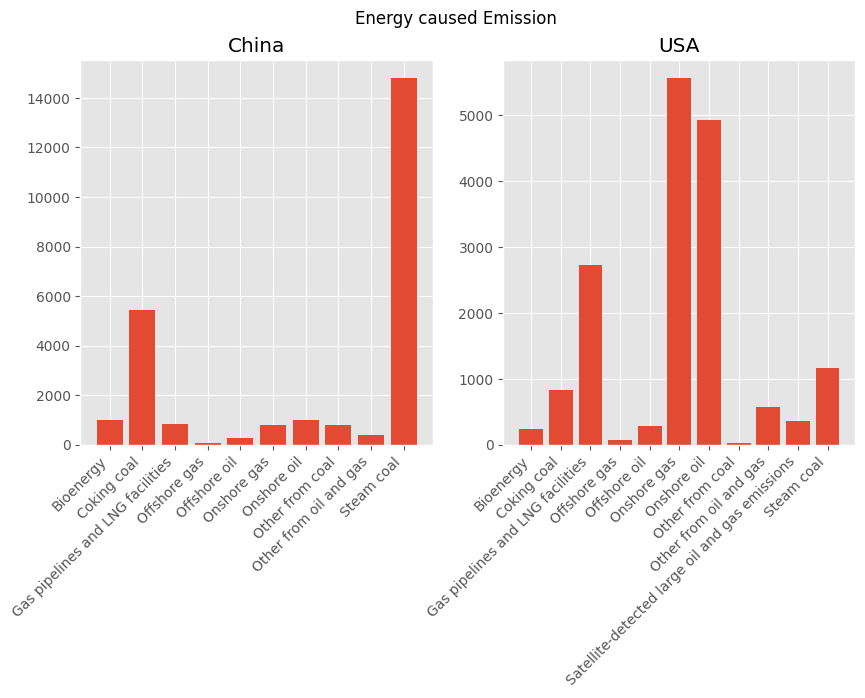

In [21]:
# create a figure with two subplots arranged horizontally
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# create the first bar plot in the first subplot
axs[0].bar(China.segment, China.emissions)
axs[0].set_title('China')
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45, ha='right')

# create the second bar plot in the second subplot
axs[1].bar(USA.segment, USA.emissions)
axs[1].set_title('USA')
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45, ha='right')

# add a title to the figure
fig.suptitle('Energy caused Emission')

# display the figure
plt.show()

C:\Users\zogaj\AppData\Local\Temp\ipykernel_4952\598083398.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(axs[1].get_xticklabels(), rotation=45, ha='right')


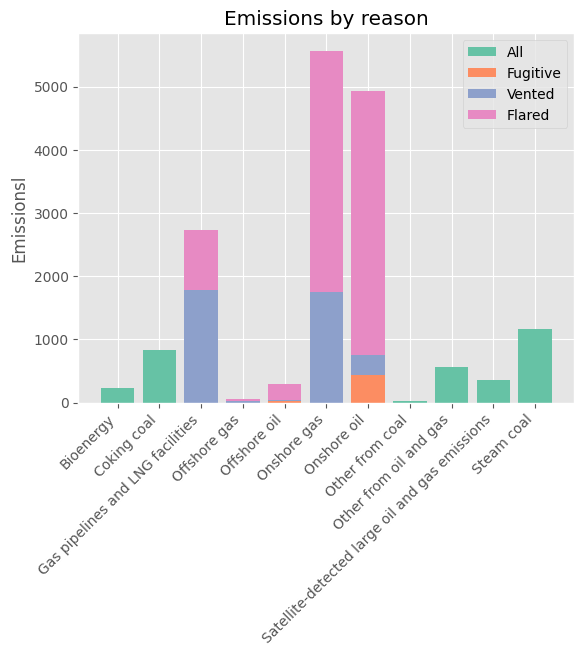

In [71]:
x = USA.segment
probs = np.array(USA.iloc[:,2:])
emits = np.array(USA.iloc[:,1])

ratios = np.transpose(probs * emits[:, np.newaxis])
colors = colors = plt.cm.Set2(range(4))

fig, ax = plt.subplots()

bottom = np.zeros(len(x))
for i, ratio in enumerate(ratios):
    ax.bar(x, ratio, bottom=bottom, color=colors[i])
    bottom += ratio

ax.legend(['All', 'Fugitive', 'Vented', 'Flared'])
ax.set_ylabel('Emissions')
ax.set_xticklabels(axs[1].get_xticklabels(), rotation=45, ha='right')
ax.set_title('Emissions by reason')
plt.show()

In [80]:
# x = tuple(USA.segment)
# probs = np.array(USA.iloc[:,2:])
# emits = np.array(USA.iloc[:,1])
# ratios = np.transpose(probs * emits[:, np.newaxis]) #(4,11)

# x2 = tuple(China.segment)
# probs2 = np.array(China.iloc[:,2:])
# emits2 = np.array(China.iloc[:,1])
# ratios2 = np.transpose(probs * emits[:, np.newaxis])

# c_dict = {x:ratios, x2:ratios}
# c_list = ["USA", "China"]
# cnt = 0 
# # ... Country dict {x:ratios, x:ratios, ...} each entry represents a country 
# # ... Country list ["USA, China, "]

# colors = colors = plt.cm.Set2(range(4))
# fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# for c,cd in zip(c_list, c_dict.values()):
#     bottom = np.zeros(len(x))
#     for i, ratio in enumerate(ratios):
#         axs[cnt].bar(x, ratio, bottom=bottom, color=colors[i])
#         bottom += ratio


#     axs[cnt].legend(['All', 'Fugitive', 'Vented', 'Flared'])
#     axs[cnt].set_ylabel('Emissionsl')
#     axs[cnt].set_xticklabels(axs[cnt].get_xticklabels(), rotation=45, ha='right')
#     axs[cnt].set_title(c)
#     cnt += 1

# plt.show()